In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
!pwd

/Users/vipulgaur/Documents/Training/advanced-ML/MLSL/Supervised-Classification/Exercises


In [3]:
!ls ../dataset

Facebook_Ads_2.csv emails.csv         loan_data.csv      women_survive.csv
advertising.csv    iris.csv           no_survivors.csv
diabetes.csv       kyphosis.csv       titan


In [4]:
df = pd.read_csv('../dataset/kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# Exploratory Data Analysis

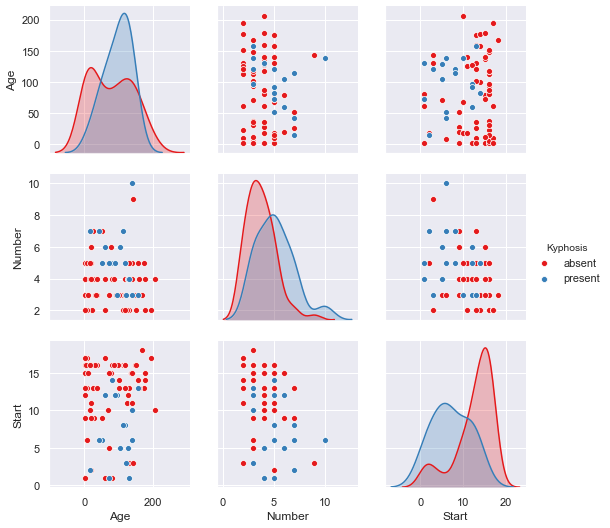

In [9]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop(['Kyphosis'],axis=1)

In [12]:
y=df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [16]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

cm =confusion_matrix(y_test,pred)

In [20]:
print(cm)

[[15  4]
 [ 4  2]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        19
     present       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [24]:
!pip install pydot

In [40]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [41]:
dot_data=StringIO()

In [42]:
export_graphviz(clf,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())


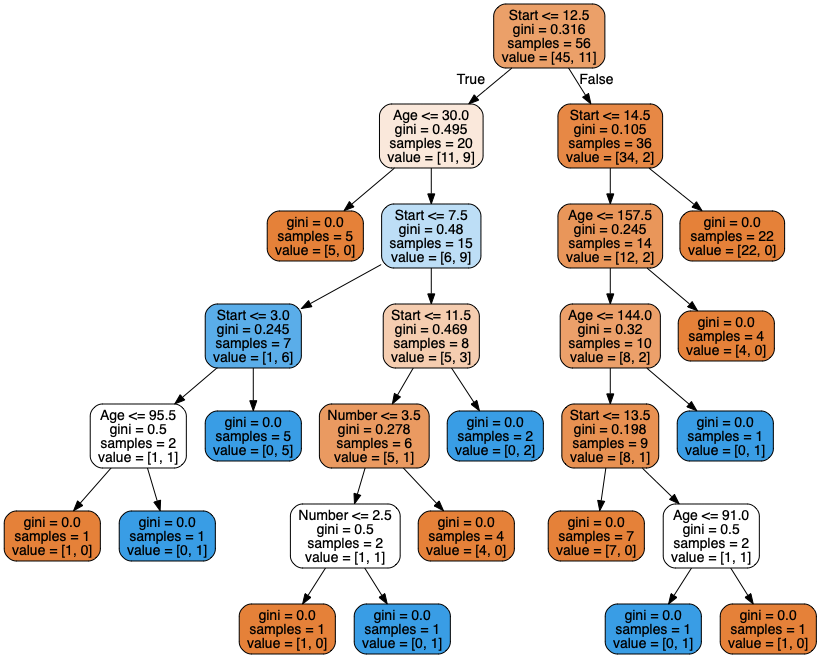

In [43]:
Image(graph[0].create_png())

In [39]:
!brew install graphviz

/bin/sh: brew: command not found


In [44]:
!pwd

/Users/vipulgaur/Documents/Training/advanced-ML/MLSL/Supervised-Classification/Exercises
